1. Download the ORL faces dataset. There are 400 faces, of the dimensions 46 × 56, from 40 people.

a. (15%) Read the 400 images into one data matrix 400 × 2576. Create an additional label column indicating
the physical gender, e.g., {0 = female, 1 = male}.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [ ]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/photos_ORL_dataset/')

pixels.shape

(400, 2576)

b. (10%) Regress the gender label on all the 2576 pixels? What do you observe?


In [ ]:
Y = gender
X = pixels

In [ ]:
import statsmodels.api as sm
import numpy as np

X_reg = sm.add_constant(X)
model = sm.OLS(Y,X_reg)
results = model.fit()

In [ ]:
results.params

array([ 3.71124339e-07, -1.89826387e-04, -1.30764085e-04, ...,
        1.45625263e-04,  4.42081375e-04,  4.75438324e-04])

(15%) Perform the stepwise regression from a null model to find the important pixels. Plot the chosen
pixels on a 46 × 56 canvas.

In [ ]:
Y.shape
X.shape

(400, 2576)

In [ ]:
#first pixel

import statsmodels.api as sm
import numpy as np

Xs= []
for j in range(0,len(X)):
  for i in range(0,len(Y)):
    Xs.append(X[i][j]) 
  Xs = sm.add_constant(Xs)
  model_2 = sm.OLS(Y,Xs)
  results_each = model_2.fit()
  p_values = results_each.pvalues
  if p_values[1] < best_p:
    best_pixel = j
    best_p = p_values[1]
  Xs = []

    



[4.76664625e-59 3.08533303e-01]
[1.94432284e-58 2.81557522e-01]
[1.60557122e-58 2.95882274e-01]
[2.12683828e-58 2.64611137e-01]
[1.00699209e-57 2.98684817e-01]
[1.06929802e-56 2.48664789e-01]
[1.82361762e-55 9.90403095e-02]
[3.73099679e-54 5.50329051e-02]
[9.77999407e-55 5.82364074e-02]
[1.27321978e-57 1.29219878e-01]
[6.61254831e-60 2.02202420e-01]
[5.32019959e-60 1.05210443e-01]
[2.09203023e-63 1.68902598e-01]
[4.05608435e-67 2.50139384e-01]
[1.04979228e-68 3.63765996e-01]
[9.85838503e-68 3.54069361e-01]
[2.36920166e-67 3.09520835e-01]
[2.44235017e-68 3.82362132e-01]
[1.00628534e-69 4.42066574e-01]
[7.06971902e-71 5.20548396e-01]
[1.42679302e-70 4.40418905e-01]
[1.07094572e-71 5.20690983e-01]
[2.18193833e-71 4.13205211e-01]
[1.56665424e-71 4.22717255e-01]
[1.63404822e-72 4.03452749e-01]
[2.01822735e-71 2.36539101e-01]
[3.15462908e-70 1.04470681e-01]
[1.13865540e-70 1.57283179e-01]
[1.08121754e-69 9.17655104e-02]
[1.57096597e-69 8.69433941e-02]
[8.91534576e-69 6.92263220e-02]
[1.73688

In [ ]:
#first pixel

import statsmodels.api as sm
import numpy as np

Xs= []
pvalues = []

for j in range(0,len(X)):
  for i in range(0,len(Y)):
    Xs.append(X[i][j]) 
  Xs = sm.add_constant(Xs)
  model_2 = sm.OLS(Y,Xs)
  results_each = model_2.fit()
  p_values = results_each.pvalues
  pvalues.append(p_values[1])

  Xs = []

    



In [ ]:
# A Python program to find the first,
# second and third minimum element
# in an array
 
MAX = 100000
 
def Print3Smallest(arr, n):
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
 
    for i in range(0, n):
         
        # Check if current element
        # is less than firstmin,
        # then update first,second
        # and third
 
        if arr[i] < firstmin:
            thirdmin = secmin
            secmin = firstmin
            firstmin = arr[i]
            first = i
 
        # Check if current element is
        # less than secmin then update
        # second and third
        elif arr[i] < secmin:
            thirdmin = secmin
            secmin = arr[i]
            second = i
 
        # Check if current element is
        # less than,then update third
        elif arr[i] < thirdmin:
            thirdmin = arr[i]
            third = i
 
    print("First pixel = ", firstmin, "position = ", first)
    print("Second pixel = ", secmin, "position = ", second)
    print("Third pixel = ", thirdmin, "position = ", third)

    return first, second, third
 
 

n = len(pvalues)
first, second, third = Print3Smallest(pvalues, n)

pixels =  [first, second, third]


First pixel =  0.020060506157918396 position =  173
Second pixel =  0.024652619985010837 position =  277
Third pixel =  0.0288166650020915 position =  233


In [ ]:
import math

x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

173
277
233


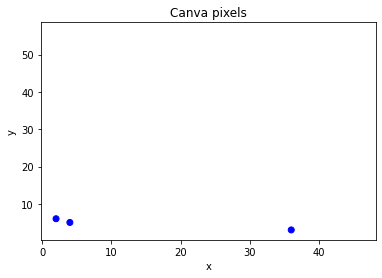

In [ ]:
import matplotlib.pyplot as plt


#colors = np.random.rand(N)
colors=["b", "b", "b", "w"]

plt.scatter(x_pos,y_pos, c=colors)

plt.title('Canva pixels')
plt.xlabel('x')
plt.ylabel('y')

plt.show()